In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [144]:
df = data = pd.read_csv("CleanData/2017/data.csv")
df.sample(5)

# Afficher les prédictions
count = df['Tendance'].value_counts()

print(count)

Tendance
droite    243698
gauche    139256
Name: count, dtype: int64


In [145]:

loire = df.loc[df['Code du département'] == '93']


loire.to_csv("./CleanData/loire.csv");

df = data.drop(data[data['Code du département'] == '93'].index)

display(df[df['Code du département'] == '23'])

df = df.drop([
'codgeo',
'Libellé de la commune',
'Code du département',
'Libellé du département',
'Code de la commune',
'Code Tendance',
'Population Total',
'Nombre de chômeurs de 15 à 64 ans',
'Population Active',
'Parti polititque'], axis=1)


,codgeo,Taux Voitures Menage,Code du département,Libellé du département,Code de la commune,Libellé de la commune,Blancs,Voix,Tendance,Code Tendance,Parti polititque,Revenus,Nombre de chômeurs de 15 à 64 ans,Population Active,Taux Chomage,Population Total,Taux scolarisées,Taux Creation Entreprise
6314,23096,0.272097,23,Creuse,96,Guéret,114,1602,droite,3,LREM,20710,989.642035,5977.623588,0.165558,13764,0.379652,9.5
6315,23096,0.272097,23,Creuse,96,Guéret,114,1350,gauche,2,LFI,20710,989.642035,5977.623588,0.165558,13764,0.379652,9.5
6316,23096,0.272097,23,Creuse,96,Guéret,114,924,droite,4,LR,20710,989.642035,5977.623588,0.165558,13764,0.379652,9.5
6317,23096,0.272097,23,Creuse,96,Guéret,114,908,droite,1,RN,20710,989.642035,5977.623588,0.165558,13764,0.379652,9.5
6318,23096,0.272097,23,Creuse,96,Guéret,114,794,gauche,3,GS,20710,989.642035,5977.623588,0.165558,13764,0.379652,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380749,23034,0.230769,23,Creuse,34,Brousse,3,0,gauche,1,LO,22461,2.000000,13.000000,0.153846,27,0.000000,0.0
380750,23034,0.230769,23,Creuse,34,Brousse,3,0,gauche,2,NPA,22461,2.000000,13.000000,0.153846,27,0.000000,0.0
380751,23034,0.230769,23,Creuse,34,Brousse,3,0,droite,4,SP,22461,2.000000,13.000000,0.153846,27,0.000000,0.0
380752,23034,0.230769,23,Creuse,34,Brousse,3,0,droite,4,RES,22461,2.000000,13.000000,0.153846,27,0.000000,0.0


In [146]:
dummy = pd.get_dummies (df ['Tendance'])
df = pd.concat( [df, dummy ], axis = 1)
df = df.drop( ['Tendance'], axis = 1)

## Visualisation

<Axes: title={'center': 'Correlation matrix heatmap'}>

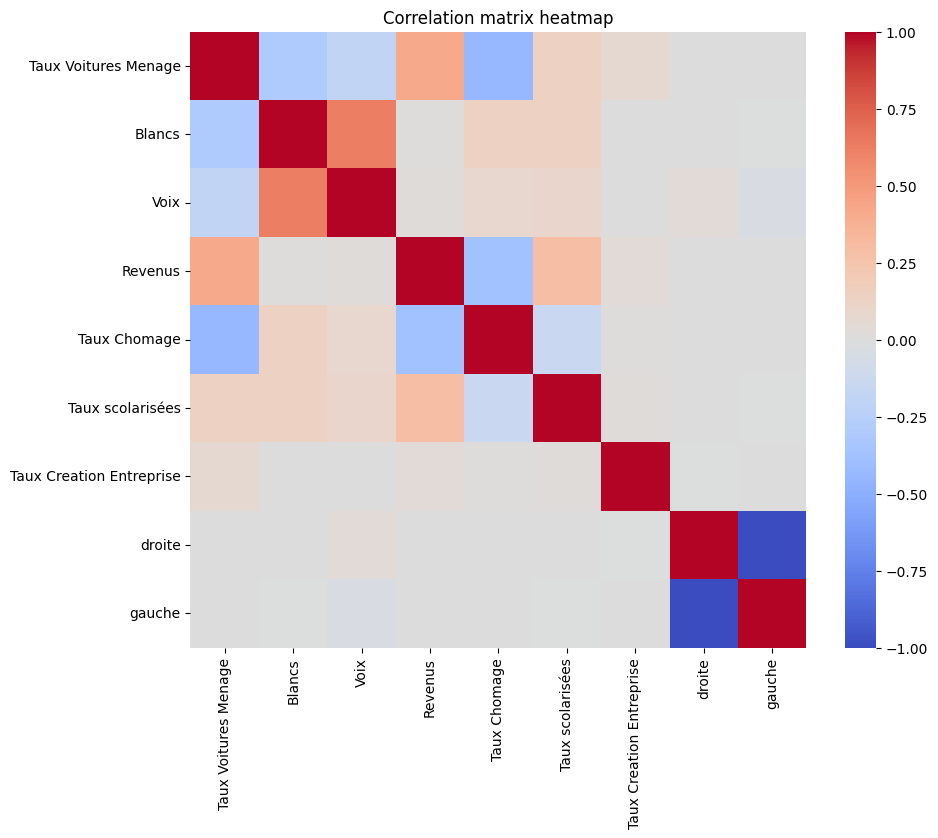

In [147]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (10, 8))
plt.title('Correlation matrix heatmap')
correlation = df.corr()
sns.heatmap(
data = correlation,
square = True,
cmap = 'coolwarm',
ax = ax
)

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

X = df.drop(["gauche", "droite"], axis=1)
Y = df[["gauche", "droite"]]


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Convertir Y en un tableau 1D
y_train = y_train.idxmax(axis=1)
y_test = y_test.idxmax(axis=1)

display(x_test)
display(y_train)
display(y_test)

,Taux Voitures Menage,Blancs,Voix,Revenus,Taux Chomage,Taux scolarisées,Taux Creation Entreprise
120197,0.592287,20,180,22270,0.085903,0.529412,9.5
33890,0.510825,28,1,23890,0.111774,0.323944,12.0
278938,0.402174,6,51,17620,0.064935,0.250000,6.2
340274,0.530612,3,19,22630,0.101695,0.333333,33.3
353352,0.461538,2,0,22461,0.068182,0.750000,33.3
...,...,...,...,...,...,...,...
319771,0.564516,5,16,19780,0.039474,0.500000,50.0
271110,0.262626,0,8,16330,0.142857,0.181818,4.8
266072,0.281553,0,18,18360,0.113636,0.166667,0.0
133896,0.151420,11,24,24550,0.118216,0.473961,8.8


267663    droite
123489    droite
93950     droite
183746    droite
287367    gauche
           ...  
261455    gauche
368115    droite
134088    gauche
149078    droite
124092    droite
Length: 304541, dtype: object

120197    droite
33890     droite
278938    droite
340274    droite
353352    droite
           ...  
319771    droite
271110    gauche
266072    gauche
133896    droite
356531    droite
Length: 76136, dtype: object

In [149]:
feature_names = df.drop(["droite", "gauche"], axis=1).columns.tolist()
feature_names

['Taux Voitures Menage',
 'Blancs',
 'Voix',
 'Revenus',
 'Taux Chomage',
 'Taux scolarisées',
 'Taux Creation Entreprise']

In [150]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

print(df.isna().sum())

tree_dc = DecisionTreeClassifier(max_depth=5, random_state=42);
tree_dc.fit(x_train, y_train);

y_pred = tree_dc.predict(x_test);
print(accuracy_score(y_test, y_pred))

Taux Voitures Menage        0
Blancs                      0
Voix                        0
Revenus                     0
Taux Chomage                0
Taux scolarisées            0
Taux Creation Entreprise    0
droite                      0
gauche                      0
dtype: int64
0.6365319953766944


In [151]:
from sklearn.ensemble import RandomForestClassifier


rd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, max_depth=2, random_state=42)
rd_clf.fit(x_train, y_train);

In [152]:
print("Ordre d'importance des features")
for name, score in zip(feature_names, rd_clf.feature_importances_):
    print('%s: %i%%' %(name, int(score*100)))

Ordre d'importance des features
Taux Voitures Menage: 9%
Blancs: 6%
Voix: 55%
Revenus: 8%
Taux Chomage: 9%
Taux scolarisées: 4%
Taux Creation Entreprise: 5%


In [153]:

from sklearn.ensemble import AdaBoostClassifier


ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=4), n_estimators=200, learning_rate=0.2, random_state=42)

ada_clf.fit(x_train, y_train)

y_pred_ada = ada_clf.predict(x_test)
print('score Adaboost :' , accuracy_score(y_test, y_pred_ada))

score Adaboost : 0.6378060313123883


In [154]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 1, 2, 6, 8],
    'n_estimators': [50, 100, 150, 200, 500, 1000, 1500],
    'learning_rate': [0.1, 0.2, 0.4],
}
# Créer un objet GradientBoostingClassifier avec des valeurs arbitraires pour les hyperparamètres
clf = GradientBoostingClassifier(max_depth=2, n_estimators=100, learning_rate=0.1, n_iter_no_change=5, tol=0.0001)

# Effectuer une recherche de grille
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=2, error_score='raise')
grid_search.fit(x_train, y_train)

# Afficher les meilleures valeurs d'hyperparamètres
print(grid_search.best_params_)

# Entraîner un GradientBoostingClassifier avec les meilleures valeurs d'hyperparamètres
best_clf = GradientBoostingClassifier(**grid_search.best_params_)
best_clf.fit(x_train, y_train)

accuracy = best_clf.score(x_test, y_test)
print(f"Accuracy : {accuracy:.2f}")

KeyboardInterrupt: 

In [155]:

x_new = pd.read_csv("./CleanData/loire.csv")

tendances = x_new['Tendance']

x_new = x_new.drop([
'codgeo',
'Libellé de la commune',
'Code du département',
'Libellé du département',
'Code de la commune',
'Code Tendance',
'Tendance',
'Population Total',
'Nombre de chômeurs de 15 à 64 ans',
'Population Active',
'Parti polititque'], axis=1)


# Effectuer des prédictions sur les nouvelles données
predictions = ada_clf.predict(x_new)

tests = pd.concat([x_new, pd.Series(predictions)], axis=1)
tests = pd.concat([tests, tendances], axis=1)

# Afficher les prédictions
unique_values, counts = np.unique(predictions, return_counts=True)

good = 0
total = 0

for i, (predicted_class, tendance) in enumerate(zip(predictions, tendances)):
    print(f"Donnée {i+1}: Tendance = {tendance}, Classe prédite = {predicted_class}")


    if predicted_class == tendance:
        good = good + 1

    total = total + 1

print("Pourcentage ", good/total)

print(unique_values)
print(counts)

Donnée 1: Tendance = droite, Classe prédite = droite
Donnée 2: Tendance = gauche, Classe prédite = droite
Donnée 3: Tendance = droite, Classe prédite = droite
Donnée 4: Tendance = gauche, Classe prédite = droite
Donnée 5: Tendance = droite, Classe prédite = droite
Donnée 6: Tendance = droite, Classe prédite = droite
Donnée 7: Tendance = gauche, Classe prédite = droite
Donnée 8: Tendance = droite, Classe prédite = droite
Donnée 9: Tendance = droite, Classe prédite = gauche
Donnée 10: Tendance = gauche, Classe prédite = gauche
Donnée 11: Tendance = droite, Classe prédite = droite
Donnée 12: Tendance = droite, Classe prédite = droite
Donnée 13: Tendance = gauche, Classe prédite = gauche
Donnée 14: Tendance = droite, Classe prédite = droite
Donnée 15: Tendance = droite, Classe prédite = droite
Donnée 16: Tendance = gauche, Classe prédite = gauche
Donnée 17: Tendance = droite, Classe prédite = droite
Donnée 18: Tendance = gauche, Classe prédite = droite
Donnée 19: Tendance = gauche, Classe 